# Mall Customers — EDA Dashboard + K-Means Clustering
### Goal: Clean EDA dashboard (matplotlib/seaborn) + clustering baseline

In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Ensure the CSV is in your working directory
df = pd.read_csv("/Users/alonsoortiz/Mall_Customers.csv")
print("Shape:", df.shape)
display(df.head())

Shape: (200, 6)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [3]:
print("\n--- Info ---")
display(df.info())
print("\n--- Missing values ---")
display(df.isna().sum())

numeric_cols = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
cat_cols = ["Gender"]

print("\n--- Numeric Summary ---")
display(df[numeric_cols].describe())

print("\n--- Categorical Summary ---")
for c in cat_cols:
    display(df[c].value_counts())


--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
 5   Cluster                 200 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 9.5+ KB


None


--- Missing values ---


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Cluster                   0
dtype: int64


--- Numeric Summary ---


,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000



--- Categorical Summary ---


Gender
Female    112
Male       88
Name: count, dtype: int64

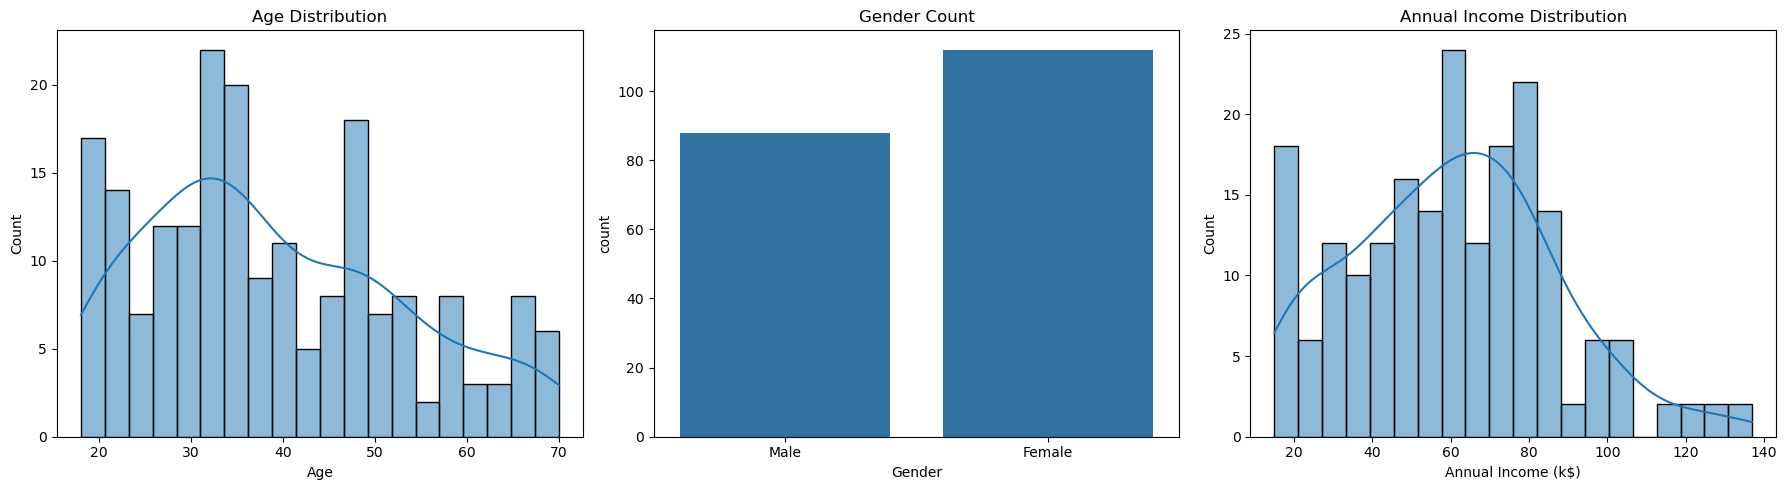

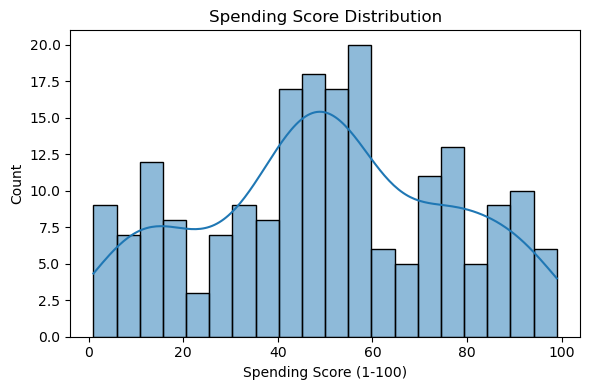

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df["Age"], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Age Distribution")

sns.countplot(x="Gender", data=df, ax=axes[1])
axes[1].set_title("Gender Count")

sns.histplot(df["Annual Income (k$)"], bins=20, kde=True, ax=axes[2])
axes[2].set_title("Annual Income Distribution")
plt.tight_layout()
plt.show()

# Spending Score alone
plt.figure(figsize=(6,4))
sns.histplot(df["Spending Score (1-100)"], bins=20, kde=True)
plt.title("Spending Score Distribution")
plt.tight_layout()
plt.show()


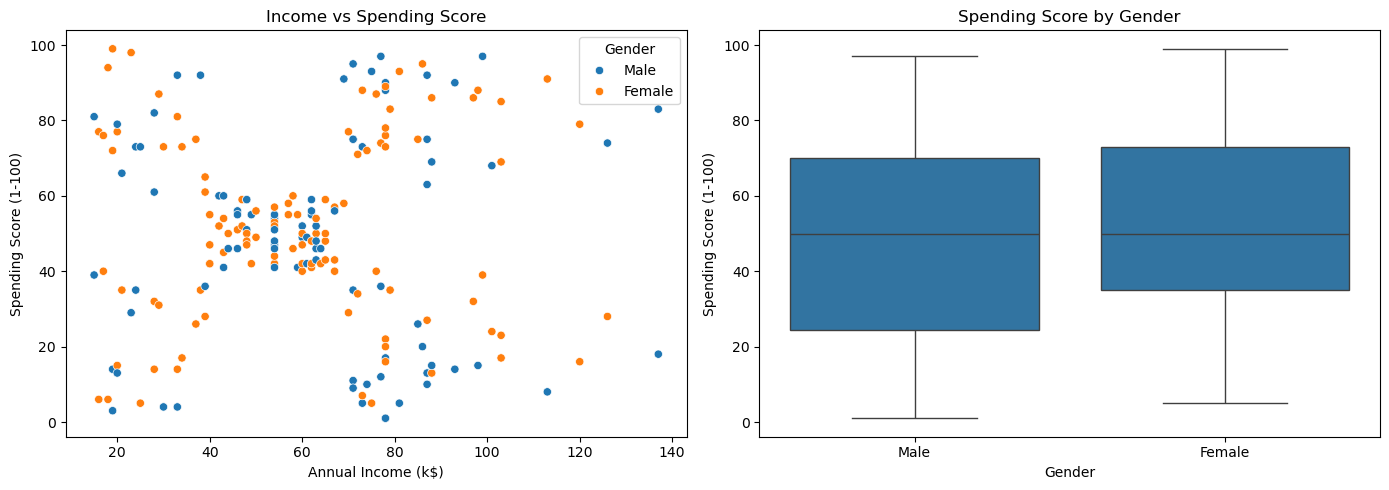

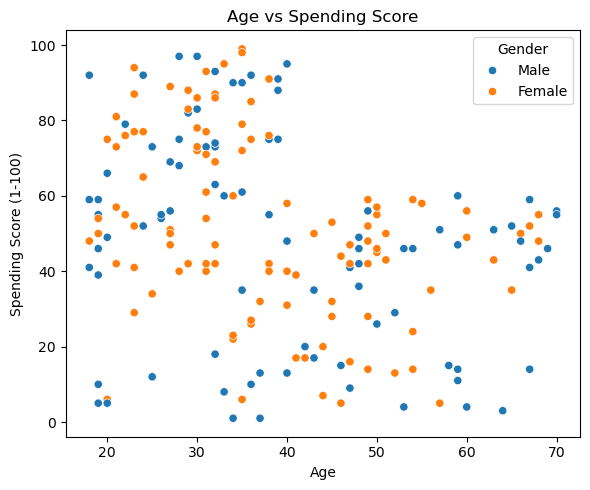

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.scatterplot(
    x="Annual Income (k$)", y="Spending Score (1-100)",
    hue="Gender", data=df, ax=axes[0]
)
axes[0].set_title("Income vs Spending Score")

sns.boxplot(
    x="Gender", y="Spending Score (1-100)",
    data=df, ax=axes[1]
)
axes[1].set_title("Spending Score by Gender")

plt.tight_layout()
plt.show()

# Optional: Age vs Spending Score
plt.figure(figsize=(6,5))
sns.scatterplot(
    x="Age", y="Spending Score (1-100)",
    hue="Gender", data=df
)
plt.title("Age vs Spending Score")
plt.tight_layout()
plt.show()

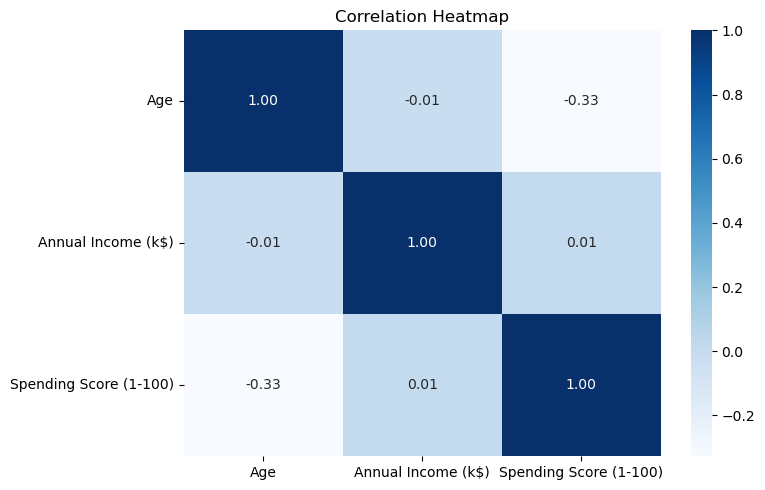

In [6]:
plt.figure(figsize=(8,5))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


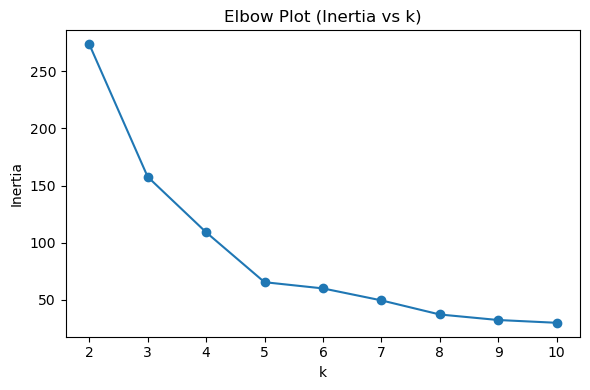

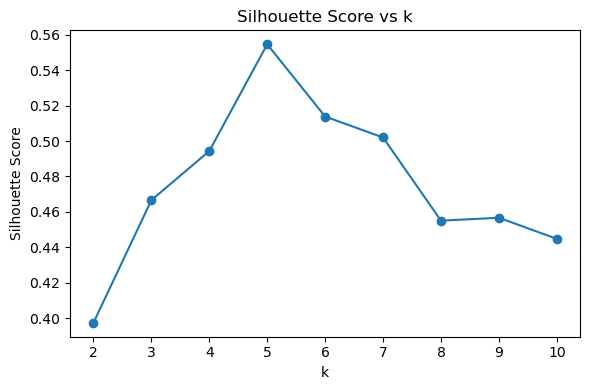

In [7]:
# Choose features (classic 2D: Income & Spending Score). Add Age later if desired.
features = df[["Annual Income (k$)", "Spending Score (1-100)"]].copy()

# Scale (important for distance-based methods)
scaler = StandardScaler()
X = scaler.fit_transform(features)

# Search k using both inertia (elbow) and silhouette
ks = list(range(2, 11))
inertias = []
silhouettes = []

for k in ks:
    km = KMeans(n_clusters=k, n_init="auto", random_state=42)
    labels = km.fit_predict(X)
    inertias.append(km.inertia_)
    sil_score = silhouette_score(X, labels)
    silhouettes.append(sil_score)

# Plot elbow
plt.figure(figsize=(6,4))
plt.plot(ks, inertias, marker="o")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow Plot (Inertia vs k)")
plt.tight_layout()
plt.show()

# Plot silhouette
plt.figure(figsize=(6,4))
plt.plot(ks, silhouettes, marker="o")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs k")
plt.tight_layout()
plt.show()



Selected k (silhouette peak): 5


,Annual Income (k$),Spending Score (1-100)
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043



--- Cluster Counts ---


Cluster
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64


--- Cluster Feature Means ---


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,42.72,55.30,49.52
1,32.69,86.54,82.13
2,25.27,25.73,79.36
3,41.11,88.20,17.11
4,45.22,26.30,20.91


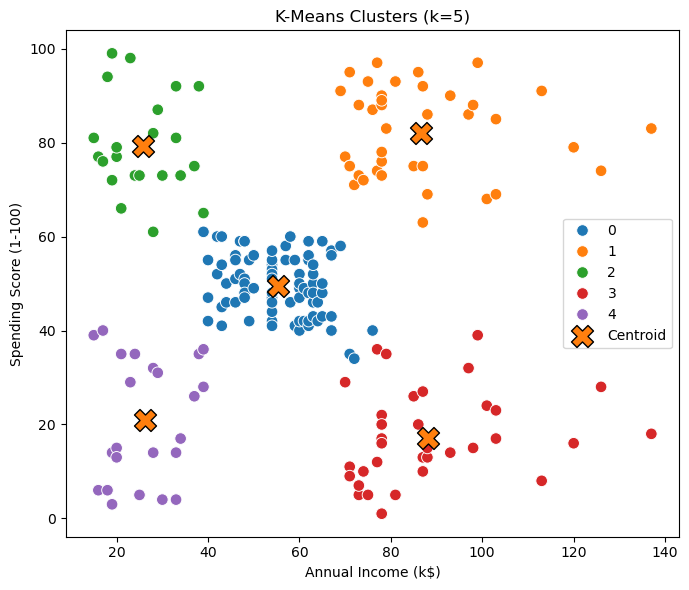

In [8]:
# Pick best k by silhouette peak (you can override manually)
best_k = ks[int(np.argmax(silhouettes))]
print(f"Selected k (silhouette peak): {best_k}")

# Fit final model
kmeans = KMeans(n_clusters=best_k, n_init="auto", random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Attach results back to df
df["Cluster"] = cluster_labels
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(centroids, columns=features.columns)
display(centroids_df)

print("\n--- Cluster Counts ---")
display(df["Cluster"].value_counts().sort_index())

print("\n--- Cluster Feature Means ---")
display(df.groupby("Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean().round(2))

# 2D visualization of clusters (Income vs Spending Score)
plt.figure(figsize=(7,6))
sns.scatterplot(
    x="Annual Income (k$)", y="Spending Score (1-100)",
    hue="Cluster", palette="tab10", data=df, s=70
)
plt.scatter(
    centroids_df["Annual Income (k$)"], centroids_df["Spending Score (1-100)"],
    s=250, marker="X", edgecolor="black", label="Centroid"
)
plt.title(f"K-Means Clusters (k={best_k})")
plt.legend()
plt.tight_layout()
plt.show()


In [20]:
df.to_csv("mall_customers_with_clusters.csv", index=False)
centroids_df.to_csv("cluster_centroids.csv", index=False)

print("Saved: mall_customers_with_clusters.csv, cluster_centroids.csv")

Saved: mall_customers_with_clusters.csv, cluster_centroids.csv
